 
---
jupyter:
  jupytext:
    cell_markers: region,endregion
    comment_magics: false
    formats: ipynb,.pct.py:hydrogen,Rmd,md
    text_representation:
      extension: .py
      format_name: hydrogen
      format_version: '1.1'
      jupytext_version: 1.1.5
  kernelspec:
    display_name: Python 3
    language: python
    name: python3
---

*ANLY 580: Natural Language Processing for Data Analytics* <br>
*Fall 2019* <br>
# 2. Tools

# Today's Plan
- Overview of tools
- Hands-on: Tokenization

Basically, today I want to make sure that everyone is able to work with NLTK and Python.

If you are unfamiliar with Linux, it's important to work through the tutorial for that. I've included the some references for the commands that Jurafsky used for text processing in Linux in the [supplement file here](https://anyl580.github.io/syllabus/2-Tools.html).

# What you should do BEFORE class

- Reading (you know this)
- Watch associated J&M videos
- Look at the lecture supplement

There's little point in my regurgitating the reading -- particularly when Jurafsky and Manning do so well explaining the concepts. Plus, your quizzes assume you did this work. So I'll be focusing on context -- what you can't get directly from J&M or the readings.

# Tools
- Development tools
- Industrial tooling

# Development Tools
- Python vs R
- Notebooks vs IDEs
- Cloud options


We'll walk through some of the links in the supplement for this section.

All of these topics elicit vigorous debate. That said:

**NLP & Programming Languages**
- Python is great if you are integrating with software developers. And there is a strong tradition of Python and NLP.
- Prior to Python: Perl, Java, C, Prolog, Lisp, Scheme... were used for NLP. And probably others.
- R is prevalent in corpus linguistics.
R provides for robust data processing via the [Tidyverse](https://www.tidyverse.org) and it's data-centric view of the world. Julia Silge wrote a really neat book called ["Tidy Textmining"](https://www.tidytextmining.com) applying these ideas to text analysis.

- In my opinion, you should be proficient in both. In this class, we are neutral with respect to the tools you prefer to use, but there is an emphasis on Python simply because of the APIs and tooling available for integration into software products.

** Notebooks vs IDEs**

You should use both! IDEs are so much better for debugging and for all of tooling that makes you more efficient at coding. **Rstudio** and **PyCharm** are both fantastic.

Notebooks are great environments for exploring data and for sharing your work. Re-usable code you should package in a Python file as a module.

**Cloud**

- For this course, we'll have a variety of options for environments.

- The best options for collaboration is by using GitHub, period. That said, you should be able to work on your laptop,  Azure Notebooks, Google Colaboratory pretty easily.
- It's possible we'll want to run some models with a GPU. You can still use Google Colaboratory or one of the cloud options (if you have an account or feel compfortable setting one up).
- I often use Docker in Digital Ocean plus my laptop (Juno app on iPad.)

# Industrial Tooling
- Crawlers
- Extractors
- Search Appliances

Why do we need to talk about this?

The vast majority of information created by humans intended to be consumed or understood by humans is textual. Even though we are focused on NLP for the purpose of data science, you as data scientists will need to learn to both use and tune tools around collection, extraction, and search.

I did not include other sorts of useful tools you may use in the workflow around orchestration, ETL, etc. - you may learn more about them in your other classes in this program.

# Pipeline
![](../images/search-1.jpg)

Image: The Search Network, Search Insights 2018. p. 9 https://searchexplained.com/product/book-search-insights-2018/

Let's start with a pipeline. As a data scientist, you quickly learn that most of the effort is around tooling and making your data usable. Every step of the way has an impact on what you do and collection is a key part of this.

# Crawlers
- Don't write your own!
- wget, Nutch, Scrapy (Python)
- There are some crawled Corpora...
Common Crawl (WARC, WET and index)
    - Can subsample based on language id, detected charset, url, etc.
    - Files truncated at 1MB!
    - Be careful of anything off the web

# Challenges
- Circular links
- Redirects
- Cookies
- Network failure
- Site-internal crazy URL

Sleep between requests, consider
randomizing a user-agent in the http-header, consider adding a "referred from" header, and, of course, respect robots.txt

# Pipeline
![](../images/search-2.jpg)

Image: The Search Network, Search Insights 2018. p. 9 https://searchexpla ined.com/product/ book-search- insights-2018/

Okay, if this is a search pipeline, you crawl... then what? There is a ton missing here!

# Extractors
![](../images/pipeline-tasks.jpg)

You already have a decent intuition now that even tokenization will impact the performance of downstream tasks. What if your documents come from many different types of sources?

Next week, Linda Moreau will talk about what kinds of things can go wrong in text extraction. I'll simply point out a few at a high level.

# Challenges
- PDF
- Images (OCR...)
- Proprietary & embedded document formats
- Exceptions
- Missing, garbled text

- There are lots of examples in Tim Allison's briefing in Canvas (this week), on where content extraction can go wrong. He is a contributor to the Apache Tika program -- and this is a content extractor you may find useful.

# Search Appliances (ELK)
![](../images/elastic.jpg)

Image from: https://www.elastic.co/blog/weblyzards-visual-exploration-of-sustainability-communication-with-elasticsearch

The Elastic stack is very useful for enabling users to explore data before a data scientist has sufficient time and understanding to model it.

# Data Exploration
![](../images/kibana-oov.jpg)

This example from Tim Allison shows how a data scientist may use an elastic index with Kibana to visualize content for data exploration. From this, you can dive directly into files to get a closer look.

# Search: Inverted Index
![](../images/inverted-index.jpg)

Elastic uses a data structure called an "inverted index" to facilitate search. This is conceptually an easy problem. But if you look closely, you will see there is lots of NLP involved.

# Search: Tokenization / Filtering
![](../images/tokenization-filtering.jpg)

To reduce the size of an index and to improve recall, you can do some work in tokenization to improve search.

# Normalization
![](../images/normalization-search.jpg)

Normalizing has a strong affect on search. Much can go wrong if this is not handled well.

# Stemming
- Non-linguistic
- Designed to improve search
- [Porter stemmer](https://www.nltk.org/_modules/nltk/stem/porter.html)

To better understand the concept of stemming, go straight to the source code in this slide and also play around with stemming words from the Brown Corpus.

Note, while stemming is relatively easy in English, some other languages have much more complex morphology and other techniques may be more prevalent than stripping affixes and using simple transformation patterns.

Stemmers are used to group similar words together and have widely been used in information retrieval. But you can also use ngram techniques. We'll talk more about ngrams next week.

# Stemming - sometimes too aggressive
![](../images/stemming.jpg)

While stemming may improve recall, it may also results in reduced precision.

# Lemmatization
- Linguistic
- Collapses *inflectional* variants

- This process involves first determining the part of speech of a word, and then applying normalization rules.

For most applications, lemmatization would not be preferred in information retrieval since it would result in lower recall.

# Tokenization / Filtering
![](../images/case-folding.jpg)

Unicode case-folding may also help to improve search, though the order in which you apply rules for stop word removal, normalization and case-folding will matter when you are working with text across multiple languages. This article provides an accessible explanation in the context of Elastic.
https://greg.blog/2013/05/01/three-principles-for-multilingal-indexing-in-elasticsearch/

# A Note on Evaluation
![](../images/recall-precision.png)

Buried in this chapter was a note about recall and precision. This visual depiction gives a clear way to see what is meant.

Along with measures of similarity such as edit distance, we'll talk quite a bit about how to use recall and precision for evaluating performance in a variety of NLP tasks.

For the purposes of tokenization, we can use recall and precision generally to see how well we do when we have ground truth. But there is no linguistically motivated way to determine a single ground truth. (The same may not be said of lemmatization.)

# Type 1 and Type 2 Error
![](../images/type-1-2.png)

I find this image to be helpful in remembering which kind of error is a type 1 (false positive) error versus type 2 (false negative) error!

# Hands-on: Tokenization

While we're largely ignoring punctuation for calculating statistics below, I want to make the cautionary note that punctuation can be quite important information and especially for tokenization when we are building a pipeline for higher levels of analysis.

J&M give the fine example of a quote mark which may distinguish the difference between a genitive (possessive) marker, clitic, and quotative as in:

> "the book's over in the containers' above"

J&M similarly mentions the potential value of of capitalization for a number of interesting cases. For example, recall the difference between:

> us and US

Thus, the Brown Corpus that we're using includes punctuation and a wide range of tags for distinguishing word forms.

For the remainder of this session, walk through the material here and in the supplemental and we'll make sure everyone is set with GitHub and the basics before we move on to language modeling (next week).

In [2]:
# If you are working in binder, you can comment any import statements in the blocks below.

import nltk

You'll need also to have the brown corpus (or any others that interest you). Again, if you are not in binder, you can use the following to download corpora. But this command you type in your terminal. Make sure you are in the same environment as your Jupyter notebook. If you don't know what this means, it's likely not an issue.

**python -m nltk.downloader brown**

We've also included versions of the tagged and untagged Brown Corpus in Canvas and in the lectures repository. When you git clone the repo (https://help.github.com/en/desktop/contributing-to-projects/cloning-a-repository-from-github-to-github-desktop),you will get copies of these. If you are working in R, you may need to do this.

Also in the repo are two individual files from the brown corpus. If you are new to Python, you also need to learn how to load files not included in libraries. These will give you an opportunity to do so.

Hopefully, you've already browsed through chapters 1 & 2 in NLTK. We'll be working from material in **chapter 3** this week and again in the fourth session of this class when we begin to learn about language modeling.

In [3]:
from nltk.corpus import brown

In [4]:
# In your anaconda distribution, you should be able to use basic unix commands.
# For example, try the ls command below to make sure this is the case.

!ls

2-tools.ipynb   2-tools.md      ca11-tagged.txt ca11.txt


In [4]:
# call.txt has no line breaks. Note what happens when you use the head command.
!head ca11.txt

Miami, Fla., March 17 --The Orioles tonight retained the distinction of being the only winless team among the eighteen Major-League clubs as they dropped their sixth straight spring exhibition decision, this one to the Kansas City Athletics by a score of 5 to 3. Indications as late as the top of the sixth were that the Birds were to end their victory draught as they coasted along with a 3-to-o advantage. Siebern hits homer Over the first five frames, Jack Fisher, the big righthander who figures to be in the middle of Oriole plans for a drive on the 1961 American League pennant, held the A's scoreless while yielding three scattered hits. Then Dick Hyde, submarine-ball hurler, entered the contest and only five batters needed to face him before there existed a 3-to-3 deadlock. A two-run homer by Norm Siebern and a solo blast by Bill Tuttle tied the game, and single runs in the eighth and ninth gave the Athletics their fifth victory in eight starts. House throws wild With one down in the e

In [4]:
# Another way to view this file using standard Python is the following.
# This time, we are only reading some number of chracters.
# I'm a fan of realpython and if you are uncomfortable with basics in Python, check it out.
# https://realpython.com/read-write-files-python/
# The command below ensures that your file is closed after the block is executed.

with open('ca11.txt') as file:
    print(file.read(20))
    ca11_raw = file.read()

Miami, Fla., March 1


In [6]:
# That said, you have some neat functions already packaged in NLTK to make things easier.
# For example:

brown.sents('ca11')

[['Miami', ',', 'Fla.', ',', 'March', '17'], ['--', 'The', 'Orioles', 'tonight', 'retained', 'the', 'distinction', 'of', 'being', 'the', 'only', 'winless', 'team', 'among', 'the', 'eighteen', 'Major-League', 'clubs', 'as', 'they', 'dropped', 'their', 'sixth', 'straight', 'spring', 'exhibition', 'decision', ',', 'this', 'one', 'to', 'the', 'Kansas', 'City', 'Athletics', 'by', 'a', 'score', 'of', '5', 'to', '3', '.'], ...]

In [7]:
# Okay, so let's play with tokenizers on a single file from Brown

from nltk.text import Text
ca11 = Text(brown.words(fileids=['ca11']))
print(len(ca11))
# Filter to only words and also normalize the case to lower
ca11_normalized = [word.lower() for word in ca11 if word.isalpha()]

#How does this change the number of words?

print(len(ca11_normalized))

# Note that if you are using the Text object that your text in ca11 is accessible via methods on this object.

2259
1856


In [8]:
ca11.count("the")
ca11.concordance("start")
ca11.vocab()

Displaying 3 of 3 matches:
rge Stepanovich relieved Hyde at the start of the ninth and gave up the A's fif
ngled deep into the hole at short to start the rally . Lumpe errs Jim Gentile b
ingered , seems to improve with each start and appeared to win the St. Patrick'


FreqDist({'the': 138, ',': 129, '.': 79, 'a': 68, 'in': 57, 'to': 55, 'and': 49, 'of': 40, 'for': 22, 'on': 17, ...})

In [9]:
# API documentation here: https://www.nltk.org/api/nltk.tokenize.html

# While NLTK gives you some nice capabilities with its included corpora, generally speaking
# you have to handle tokenization yourself via the use of APIs in tools like SpaCy. Later,
# when we get to the module where we use SpaCy we'll do some performance comparisons
# between NLTK and SpaCy for tokenization. But for how, let's use NLTK.

from nltk.tokenize import WhitespaceTokenizer

WhitespaceTokenizer().tokenize(ca11_raw)

['7',
 '--The',
 'Orioles',
 'tonight',
 'retained',
 'the',
 'distinction',
 'of',
 'being',
 'the',
 'only',
 'winless',
 'team',
 'among',
 'the',
 'eighteen',
 'Major-League',
 'clubs',
 'as',
 'they',
 'dropped',
 'their',
 'sixth',
 'straight',
 'spring',
 'exhibition',
 'decision,',
 'this',
 'one',
 'to',
 'the',
 'Kansas',
 'City',
 'Athletics',
 'by',
 'a',
 'score',
 'of',
 '5',
 'to',
 '3.',
 'Indications',
 'as',
 'late',
 'as',
 'the',
 'top',
 'of',
 'the',
 'sixth',
 'were',
 'that',
 'the',
 'Birds',
 'were',
 'to',
 'end',
 'their',
 'victory',
 'draught',
 'as',
 'they',
 'coasted',
 'along',
 'with',
 'a',
 '3-to-o',
 'advantage.',
 'Siebern',
 'hits',
 'homer',
 'Over',
 'the',
 'first',
 'five',
 'frames,',
 'Jack',
 'Fisher,',
 'the',
 'big',
 'righthander',
 'who',
 'figures',
 'to',
 'be',
 'in',
 'the',
 'middle',
 'of',
 'Oriole',
 'plans',
 'for',
 'a',
 'drive',
 'on',
 'the',
 '1961',
 'American',
 'League',
 'pennant,',
 'held',
 'the',
 "A's",
 'scoreles

In [10]:
# Exercise 1: Whitespace tokenization

# How many tokens are there?

whitespace_tokens = WhitespaceTokenizer().tokenize(ca11_raw)
len(whitespace_tokens)

# What do you see that looks like a problem?

# Some ideas...
# --The Dashes
#  "A's" Python treated the quote marks as Python
# hits. 
# Cipriani's 
# 6-foot-3-inch Unsure if some hyphenated token sequences should be considered a "word"
# 2-and-2 (same as above)
# Upper and lower case words (e.g., "The" and "the")
# 'physically",',
# The text has unexpected inconsistencies or errors...

2015

In [9]:
# Exercise 2: Regular expression tokenization

#https://www.nltk.org/api/nltk.tokenize.html#nltk.tokenize.regexp.RegexpTokenizer
from nltk.tokenize import RegexpTokenizer

# From the documentation this is a tokenizer that splits a string using a regular expression,
# which matches either the tokens or the separators between tokens.

# tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|\S+')

# Tokenization is a task you need to become proficient with. Sometimes included
# tokenizers do what you want, but other times you will need to provide additional
# pre-processing to ensure text is tokenized the way you would like it to be.

# With some help from rexpr, write a regular expression that tokenizes the text,
# handling the problems you noted above.

# This is a slightly better way to create such a long regular expression.

pattern1 = r'''(?x)     # set flag to allow verbose regexps**
     (?:[A-Z]\.)+       # abbreviations, e.g. U.S.A.
     | \w+(?:-\w+)*       # words with optional internal hyphens
     | \$?\d+(?:\.\d+)?%? # currency and percentages, e.g. $12.40, 82%
'''

pattern2 = r'''(?x)
      (?:[A-Z]\.)+     # abbreviations, e.g. U.S.A
      | \w+(?:-\w+)*   # words with internal hyphens
      | \$?[0-9]+[,-\.]?[0-9]   # currency and percentages e.g., $12.40, 83%
'''

tokenizer = RegexpTokenizer(pattern2)
my_ca11_tokens = tokenizer.tokenize(ca11_raw)

my_ca11_normalized = [word.lower() for word in my_ca11_tokens]
print(my_ca11_normalized)
# Could you fix everything you noted was wrong from the Whitespace tokenizer?

# Not really. There are inconsistencies even in this text -- and some interesting number formats. 
# You would need to set up multiple pre-processing steps to get the fidelity you might want.
#  J. A. W.
# 2.21.6


['7', 'the', 'orioles', 'tonight', 'retained', 'the', 'distinction', 'of', 'being', 'the', 'only', 'winless', 'team', 'among', 'the', 'eighteen', 'major-league', 'clubs', 'as', 'they', 'dropped', 'their', 'sixth', 'straight', 'spring', 'exhibition', 'decision', 'this', 'one', 'to', 'the', 'kansas', 'city', 'athletics', 'by', 'a', 'score', 'of', '5', 'to', '3', 'indications', 'as', 'late', 'as', 'the', 'top', 'of', 'the', 'sixth', 'were', 'that', 'the', 'birds', 'were', 'to', 'end', 'their', 'victory', 'draught', 'as', 'they', 'coasted', 'along', 'with', 'a', '3-to-o', 'advantage', 'siebern', 'hits', 'homer', 'over', 'the', 'first', 'five', 'frames', 'jack', 'fisher', 'the', 'big', 'righthander', 'who', 'figures', 'to', 'be', 'in', 'the', 'middle', 'of', 'oriole', 'plans', 'for', 'a', 'drive', 'on', 'the', '1961', 'american', 'league', 'pennant', 'held', 'the', 'a', 's', 'scoreless', 'while', 'yielding', 'three', 'scattered', 'hits', 'then', 'dick', 'hyde', 'submarine-ball', 'hurler', '

In [12]:
# Exercise 3: Tagged Text

# One of the really neat things about the Brown Corpus (and others like it), are the additional annotations
# that give you more information about the text and word distributions in it.
# NLTK includes a probability module with the ability to collect conditional frequency
# distribution over tokens in text.

# Let's switch to the entire Brown corpus now, and also use the tokenization provided by
# the Text object.

# API documentation here:
# https://www.nltk.org/api/nltk.html#nltk.probability.ConditionalFreqDist

from nltk.probability import ConditionalFreqDist
from nltk.probability import FreqDist

# From the documentation, A frequency distribution records the number of times
# each outcome of an experiment has occurred. For example, a frequency distribution
# could be used to record the frequency of each word type in a document.

# fdist = FreqDist(word.lower() for word in word_tokenize(sent))

# Conditional frequency distributions are used to record the number of times each sample
# occurred, given the condition under which the experiment was run.
# For example, a conditional frequency distribution could be
# used to record the frequency of each word (type) in a document, given its length.



In [13]:
# Exercise 3: Tagged text (continued)

# What we'd like to do now is look at combinations of word types and tags 
# in the Brown Corpus.

freq_dist = FreqDist()
cond_freq_dist = ConditionalFreqDist()

# Most common word in the corpus
for a_word in brown.words():
    a_word.lower()
    freq_dist[a_word] += 1

# What is the most common word?
word_dist = freq_dist.max()

# Tagged words are in tuples
brown.tagged_words()[:10]


[('The', 'AT'),
 ('Fulton', 'NP-TL'),
 ('County', 'NN-TL'),
 ('Grand', 'JJ-TL'),
 ('Jury', 'NN-TL'),
 ('said', 'VBD'),
 ('Friday', 'NR'),
 ('an', 'AT'),
 ('investigation', 'NN'),
 ('of', 'IN')]

In [20]:
# Given a word, list the possible tags for that word with its frequency count.

# Example: a particular word should generate a list like [('nn', 12), ('vb', 22)]

word = "get"

# You can use ConditionalFreqDist() for conditional frequencies of words and tags.

for (_,word) in brown.tagged_words():
    word.lower()
    cond_freq_dist[_][word] += 1
    
cond_freq_dist["get"]
# This outputs a dictionary on which you can perform other operations.

for k, v in cond_freq_dist["get"].items():
    print(k, v)

# That said, it turns out NLTK now has an easy way to list the possible tags
# for a word along with its frequency count.

cond_freq_dist["get"].tabulate()

VB 2148
VB-HL 6
VB-NC 3
   VB VB-HL VB-NC 
 2148     6     3 


In [17]:
# Exercise 4: Ambiguous words

# Find the word which have the greatest variety of tags.

# Find the word which has the greatest variety of tags.


max_tags_count = -1
max_tags_word = ''

for word in cond_freq_dist.conditions():
    word.lower()
    if cond_freq_dist[word].B() > max_tags_count:
        max_tags_count = cond_freq_dist[word].B()
        max_tags_word = word
        
print(max_tags_count)
print(max_tags_word)

12
that


In [18]:
# Exercise 5: Ambiguity in the corpus

# How many ambiguous word types are there?
# This boils down to 'how may words types have more than one tag'?

# Here, conditions are word types

ambiguous_words = 0
for type in cond_freq_dist.conditions():
    if len(list(cond_freq_dist[type])) > 1:
        ambiguous_words = ambiguous_words + 1

# What is the percentage of ambiguous words across the entire vocabulary?

(100.0 * ambiguous_words / len(list(freq_dist.keys())) )

15.571650284531815

In [21]:
%matplotlib inline
from matplotlib import pyplot as plt

In [25]:
# Taken directly from

def separate_tokens_types(words):

    """
    Given a list of words from a corpus, separate the counts of tokens and
    types in time. Return the two lists.
    """

    t_d = {}
    tokens, types = [], []
    count = 0
    for i in range(len(words)):

        if words[i] not in t_d:
            count += 1
            t_d[words[i]] = 1

        tokens.append(i + 1)
        types.append(count)

    return tokens, types

/Users/lisa/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


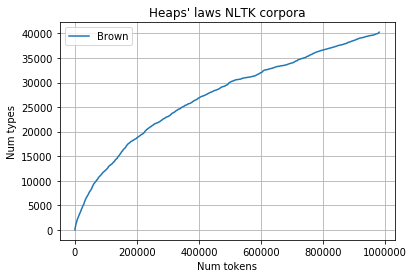

In [26]:
# Exercise 6: Heap's Law

# Someone has largely done the work for you... but go through and plot Heap's curve
# (types versus tokens) on the Brown corpus.
# https://github.com/martinapugliese/the-talking-data/blob/master/quantifying-natural-languages/Heaps's%20laws%20different%20languages.ipynb

brown_words = [word.lower() for word in brown.words() if word.isalpha()]
brown_t_tokens, brown_t_types = separate_tokens_types(brown_words)

# Plot the Heaps' curves, linear scale

plt.plot(brown_t_tokens, brown_t_types, label='Brown')

plt.grid()
plt.legend()
plt.title("Heaps' laws NLTK corpora")
plt.xlabel('Num tokens')
plt.ylabel('Num types')
plt.show()